# <font color='darkred'>**TMBD Movies**</font>

## **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## **Introduction**

> This dataset comes from IMDB and contains information about 10,000 movies,
short films and tv series collected from The Movie Database (TMDb), including user ratings, revenue, runtime and budget.

## **Generate Questions**

In this project, i'll be answering the following questions:
- What's the genre with the highest median popularity?
- What's the genre with the highest median revenue?
- What's the genre with the highest median vote_count?
- What's the genre with the highest mean vote_average?
- what movie is considered movie genre is considered the "best"?
- What month is considered "best" for releasing a films?
- What is the relationship between the columns and each other?

## **Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## **Data Wrangling**


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df= pd.read_csv('C:/Users/Amin/Documents/Ironhack_lab/week_15/lab-tmdb-movies-eda-wrangling/tmdb-movies.csv')


In [ ]:
# Display first 3 rows
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [ ]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [ ]:
# Summary statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [ ]:
# Finding duplicates
df.duplicated().sum()

1

In [ ]:
#Dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Confirming that duplicates don no exist anymore
df.duplicated().sum()

0

## **Data Cleaning**

In [9]:
# create a function to find and display NAs

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    return mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0]

missing_values_table(df)

,Missing Values,% of Total Values
imdb_id,10,0.092039
cast,76,0.699494
homepage,7929,72.977451
director,44,0.404970
tagline,2824,25.991717
keywords,1493,13.741371
overview,4,0.036815
genres,23,0.211689
production_companies,1030,9.479982


In [ ]:
# Dropping columns with too many missing values
df.drop(['homepage', 'tagline'], axis=1, inplace=True)

# Dropping rows where imdb_id is missing 
df = df[df['imdb_id'].notna()].copy()

# Fill missing values
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['overview'] = df['overview'].fillna('')
df['keywords'] = df['keywords'].fillna('')
df['genres'] = df['genres'].fillna('Unknown')
df['production_companies'] = df['production_companies'].fillna('Unknown')



<a id='eda'></a>
## **Exploratory Data Analysis**

### What's the genre with the highest median popularity?

genres
Adventure    0.624363
Name: popularity, dtype: float64


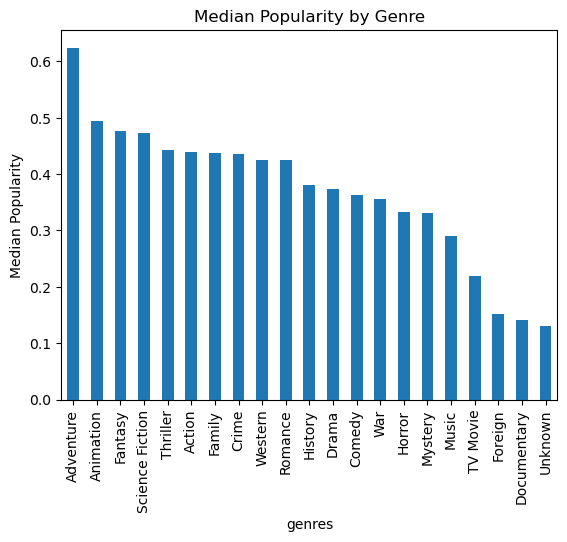

In [ ]:
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0]) 

genre_popularity = df.groupby('genres')['popularity'].median().sort_values(ascending=False)
print(genre_popularity.head(1))
genre_popularity.plot(kind='bar', title='Median Popularity by Genre')
plt.ylabel('Median Popularity')
plt.show()


### What's the genre with the highest median revenue?

genres
Adventure    12145169.0
Name: revenue, dtype: float64


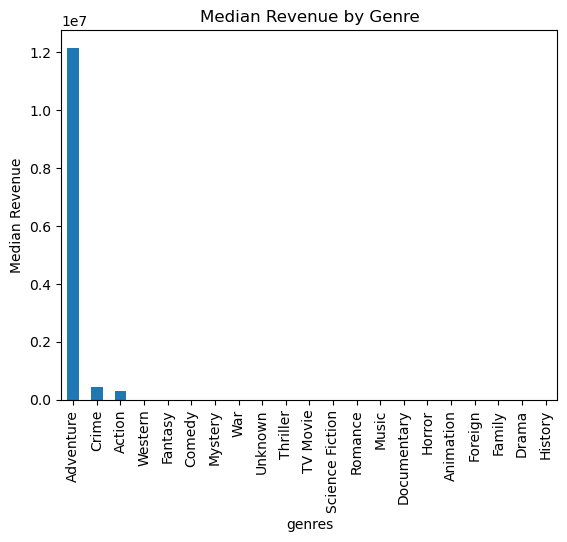

In [12]:
genre_revenue = df.groupby('genres')['revenue'].median().sort_values(ascending=False)
print(genre_revenue.head(1))
genre_revenue.plot(kind='bar', title='Median Revenue by Genre')
plt.ylabel('Median Revenue')
plt.show()


### What's the genre with the highest median vote_count?

genres
Adventure    110.0
Name: vote_count, dtype: float64


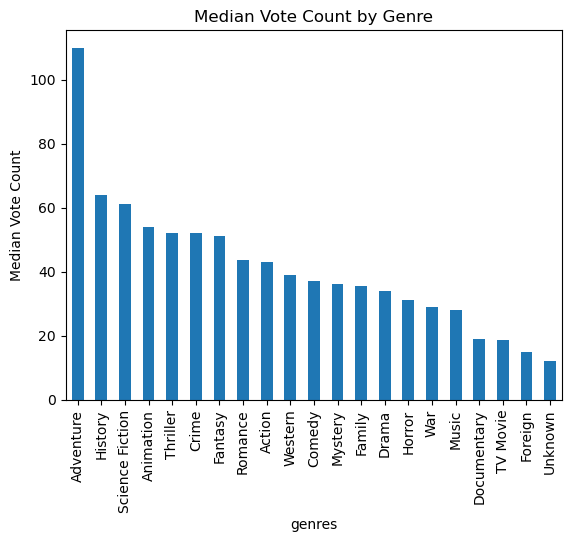

In [13]:
genre_votes = df.groupby('genres')['vote_count'].median().sort_values(ascending=False)
print(genre_votes.head(1))
genre_votes.plot(kind='bar', title='Median Vote Count by Genre')
plt.ylabel('Median Vote Count')
plt.show()


### What's the genre with the highest mean vote_average?

genres
Documentary    6.922042
Name: vote_average, dtype: float64


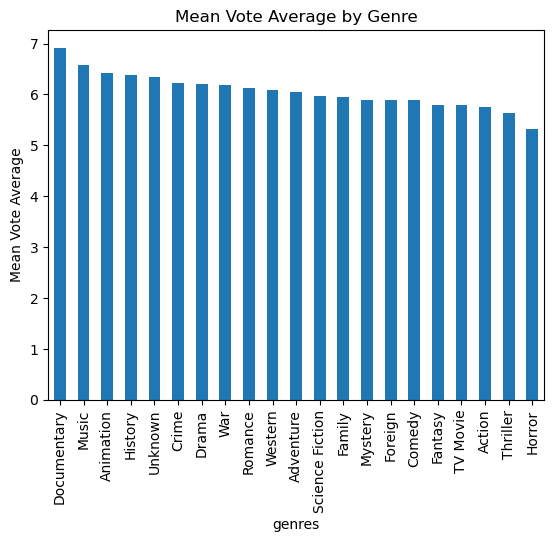

In [14]:
genre_vote_avg = df.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
print(genre_vote_avg.head(1))
genre_vote_avg.plot(kind='bar', title='Mean Vote Average by Genre')
plt.ylabel('Mean Vote Average')
plt.show()


### What movie is considered movie genre is considered the "best"?


In [15]:
# What Genre is Considered the "Best"?  we can define 'best' as highest vote average and high revenue

genre_quality = df.groupby('genres')[['vote_average', 'revenue']].mean()
genre_quality['score'] = genre_quality['vote_average'] * np.log1p(genre_quality['revenue'])
print(genre_quality.sort_values('score', ascending=False).head(1))


           vote_average       revenue       score
genres                                           
Animation      6.413682  7.163445e+07  116.004815


### What month is considered "best" for releasing a films/shows?


In [ ]:
#Converting the release date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')
print(df['release_month'].value_counts().sort_index())

#Creating a month column
df['release_month'] = df['release_date'].dt.month


release_month
1      915
2      691
3      822
4      797
5      809
6      827
7      799
8      917
9     1329
10    1151
11     814
12     984
Name: count, dtype: int64


In [ ]:
#Checking the revenue column for zero values and non-zero values
print("Total rows:", len(df))
print("Non-zero revenue entries:", (df['revenue'] > 0).sum())
print("Zero revenue entries:", (df['revenue'] == 0).sum())
print("Missing revenue entries:", df['revenue'].isnull().sum())


Total rows: 10855
Non-zero revenue entries: 4849
Zero revenue entries: 6006
Missing revenue entries: 0


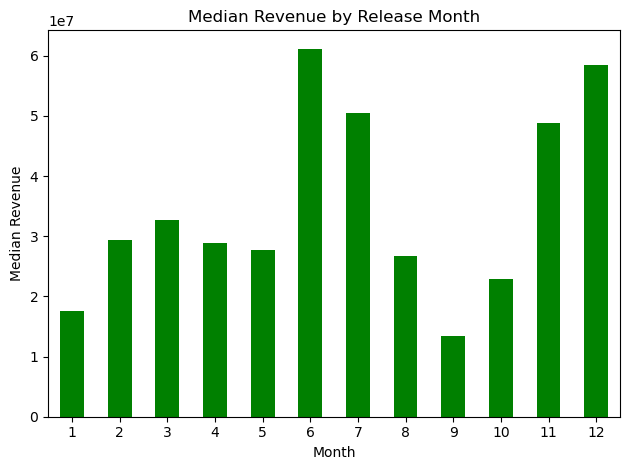

Best month: 6


In [ ]:
# Filtering to only rows with revenue > 0
df_nonzero = df[df['revenue'] > 0].copy()

# Group and plot
month_revenue = df_nonzero.groupby('release_month')['revenue'].median()
month_revenue.plot(kind='bar', title='Median Revenue by Release Month', color='green')

plt.ylabel('Median Revenue')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("Best month:", month_revenue.idxmax())


### What is the relationship between the columns and each other?

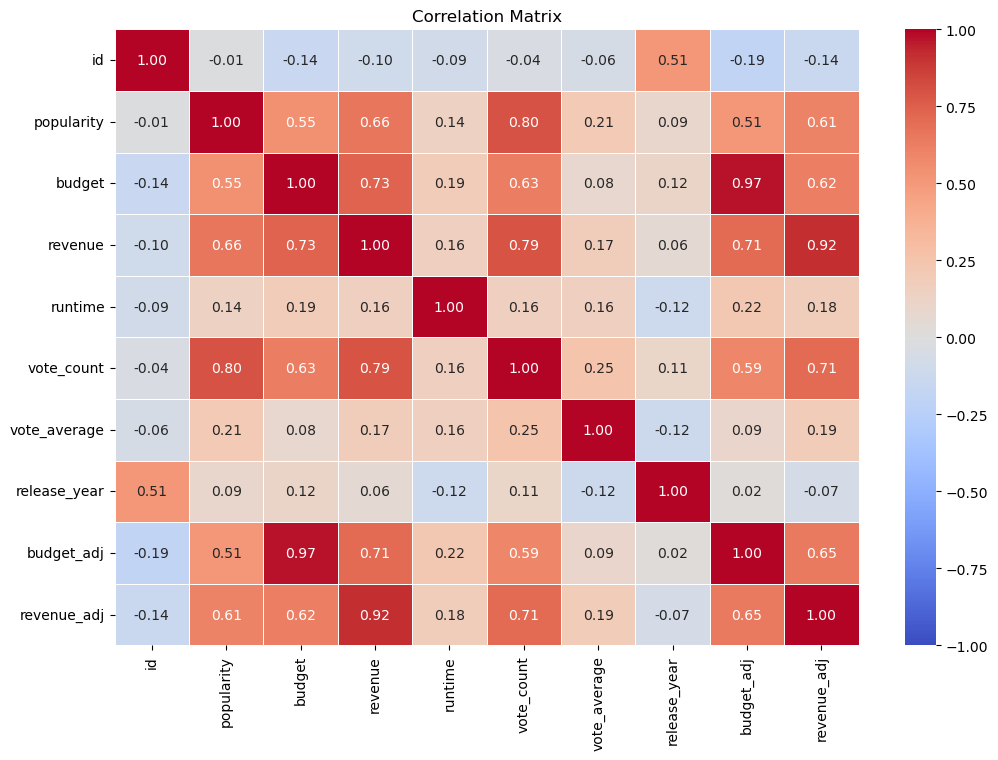

In [ ]:
# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Computing correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plotting correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<a id='conclusions'></a>
## Conclusions




In [ ]:
#The analysis reveals several key insights into the TMDb dataset. 
#Adventure consistently emerges as the most popular and highest-revenue genre, highlighting its strong audience appeal and profitability. 
#However, Animation is considered the "best" genre overall due to its high vote average and substantial revenue. 
#June proves to be the optimal month for film releases, likely benefiting from summer audiences. 
# The correlation matrix shows strong positive relationships between budget and revenue, as well as vote count and popularity, 
# reinforcing the idea that higher investments and engagement lead to greater success.


## Limitations

In [ ]:
#The dataset contains missing values, especially in key fields like homepage, tagline, and production companies, which could affect the completeness of the analysis.
# Additionally, the correlation analysis only captures linear relationships and does not establish causation, meaning deeper insights may require more complex modeling. 
# Revenue data also has many zero values, which might skew some financial trends.
